# Import Package Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Import Data for Gold Futures

In [ ]:
series = yf.Ticker("GC=F")
starting_cash = 10
prices_open = series.history(start='2024-05-31', end='2024-06-15', interval='1h').Open
returns_open = prices_open.pct_change().dropna()

Text(0, 0.5, 'Prices')

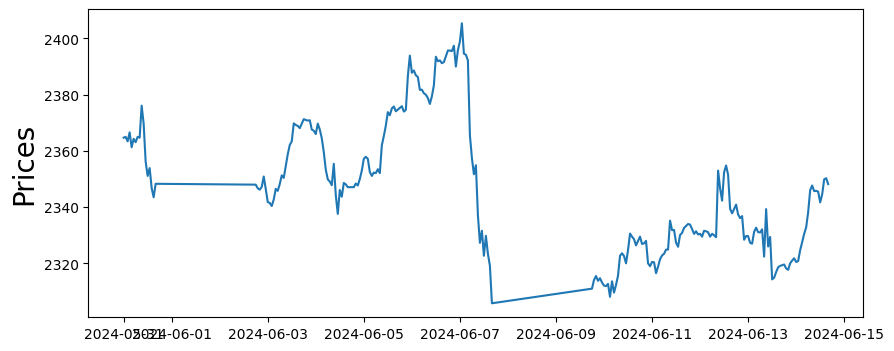

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(prices_open)
plt.ylabel('Prices', fontsize=20)

# Buying At Open, Selling at Close

In [ ]:
def BuySellModel(starting_cash):
    cash = starting_cash
    revenue = np.zeros(len(prices_open))
    cash_used = 0

    for i in range(1, len(prices_open)):
        shares = starting_cash / prices_open[i-1]
        cash = shares * prices_open[i]
        cash_used += starting_cash
        revenue[i] = cash - starting_cash
        print(f"Hour {i}: \n Hourly Open = {prices_open[i-1]},  \n Hourly Close = {prices_open[i]},  \n Cash = {cash}, \n Shares = {shares},  \n Hourly Revenue = {revenue[i]}, \n")

    plt.figure(figsize=(10, 4))
    days = range(len(revenue))
    plt.scatter(days, revenue, color='blue', label='Revenue')
    plt.plot(days, revenue, color='blue')
    plt.ylabel('Revenue', fontsize=20)
    plt.xlabel('Hour', fontsize=20)
    plt.title('Revenue Over Time', fontsize=20)
    plt.legend()

    xticks = range(0, len(revenue), 24)
    plt.xticks(xticks)

    for day, rev in zip(days, revenue):
        plt.text(day, rev, f'{round(rev, 2)}', fontsize=7, ha='left', va='bottom')

    plt.show()

    total_revenue = 0
    for i in range(len(revenue)):
        total_revenue += revenue[i]
    print('Cash Used: ', cash_used)
    return total_revenue

 Hourly Close = 2393.5,  
 Cash = 10.042797595614912, 
 Shares = 0.0041958627932379,  
 Hourly Revenue = 0.042797595614912254, 

Hour 105: 
 Hourly Open = 2393.5,  
 Hourly Close = 2391.89990234375,  
 Cash = 9.993314820738458, 
 Shares = 0.004177982034677251,  
 Hourly Revenue = -0.006685179261541663, 

Hour 106: 
 Hourly Open = 2391.89990234375,  
 Hourly Close = 2392.199951171875,  
 Cash = 10.001254437227205, 
 Shares = 0.004180776959019607,  
 Hourly Revenue = 0.0012544372272049742, 

Hour 107: 
 Hourly Open = 2392.199951171875,  
 Hourly Close = 2391.199951171875,  
 Cash = 9.995819747427424, 
 Shares = 0.0041802525725749915,  
 Hourly Revenue = -0.0041802525725760376, 

Hour 108: 
 Hourly Open = 2391.199951171875,  
 Hourly Close = 2391.60009765625,  
 Cash = 10.001673412899574, 
 Shares = 0.00418200075451625,  
 Hourly Revenue = 0.0016734128995743447, 

Hour 109: 
 Hourly Open = 2391.60009765625,  
 Hourly Close = 2395.699951171875,  
 Cash = 10.017142721810568, 
 Shares = 0.00

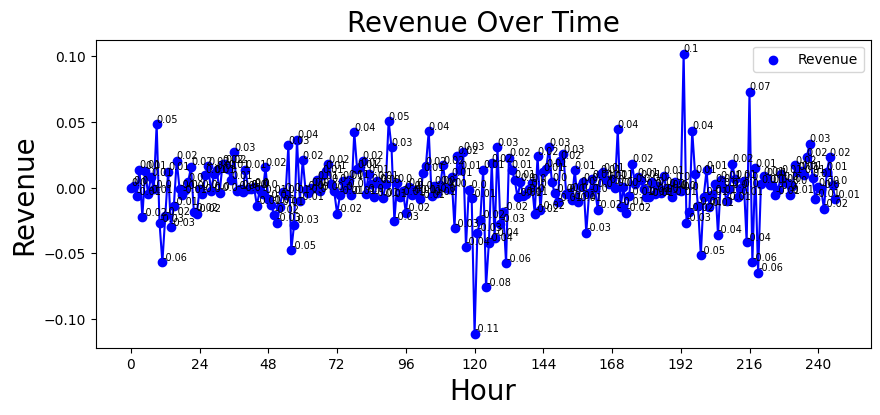

Cash Used:  2460


-0.0643525011235635

In [ ]:
BuySellModel(starting_cash)

# Buying At Open, Selling at Close if Profit, else hold

In [ ]:
def BuySellModelProfit(starting_cash):
    cash = starting_cash
    revenue = np.zeros(len(prices_open))
    holding = False
    cash_used = 0

    for i in range(0, len(prices_open)-1):
      if holding:
        shares = starting_cash / prices_open[i]
        cash = shares * prices_open[i+1]

      if prices_open[i+1] > prices_open[i]:
        revenue[i] = cash - starting_cash
        cash_used += starting_cash
        print(f"Hour {i}: \n Hourly Open = {prices_open[i]},  \n Hourly Close = {prices_open[i+1]},  \n Cash = {cash}, \n Hourly Revenue = {revenue[i]} \n")
      else:
        revenue[i] = 0
        holding = True
        print(f"Hour {i}: No Trades Executed, loss expected", prices_open[i+1]-prices_open[i], "\n")

    if holding:
        cash = shares * prices_open[-1]
        revenue[-1] = cash - starting_cash
        print(f"Hour {i}: Forced Sell: Close = {prices_open[-1]}, Cash = {cash}, Revenue = {revenue[-1]}")

    # plt.figure(figsize=(10, 4))
    # days = range(len(revenue))
    # plt.scatter(days, revenue)
    # plt.plot(days, revenue, color='blue')
    # plt.ylabel('Revenue', fontsize=20)
    # plt.xlabel('Day', fontsize=20)
    # plt.title('Revenue At Each Day', fontsize=20)

    # for day, rev in zip(days, revenue):
    #     plt.text(day, rev, f'{round(rev, 2)}', fontsize=7, ha='left', va='bottom')
    # plt.show()

    plt.figure(figsize=(10, 4))
    days = range(len(revenue))
    plt.scatter(days, revenue, color='blue', label='Revenue')
    plt.plot(days, revenue, color='blue')
    plt.ylabel('Revenue', fontsize=20)
    plt.xlabel('Hour', fontsize=20)
    plt.title('Revenue Over Time', fontsize=20)
    plt.legend()

    xticks = range(0, len(revenue), 24)
    plt.xticks(xticks)

    for day, rev in zip(days, revenue):
        plt.text(day, rev, f'{round(rev, 2)}', fontsize=7, ha='left', va='bottom')

    plt.show()

    total_revenue = 0
    for i in range(len(revenue)):
        total_revenue += revenue[i]
    print('Cash Used: ', cash_used)
    return total_revenue

Hour 0: 
 Hourly Open = 2364.699951171875,  
 Hourly Close = 2365.0,  
 Cash = 10, 
 Hourly Revenue = 0.0 

Hour 1: No Trades Executed, loss expected -1.60009765625 

Hour 2: 
 Hourly Open = 2363.39990234375,  
 Hourly Close = 2366.60009765625,  
 Cash = 10.013540642484271, 
 Hourly Revenue = 0.013540642484271004 

Hour 3: No Trades Executed, loss expected -5.300048828125 

Hour 4: 
 Hourly Open = 2361.300048828125,  
 Hourly Close = 2364.300048828125,  
 Cash = 10.012704865700947, 
 Hourly Revenue = 0.012704865700946755 

Hour 5: No Trades Executed, loss expected -1.199951171875 

Hour 6: 
 Hourly Open = 2363.10009765625,  
 Hourly Close = 2365.0,  
 Cash = 10.008039872477827, 
 Hourly Revenue = 0.008039872477827004 

Hour 7: No Trades Executed, loss expected -0.300048828125 

Hour 8: 
 Hourly Open = 2364.699951171875,  
 Hourly Close = 2376.10009765625,  
 Cash = 10.048209695605252, 
 Hourly Revenue = 0.04820969560525157 

Hour 9: No Trades Executed, loss expected -6.400146484375 

H

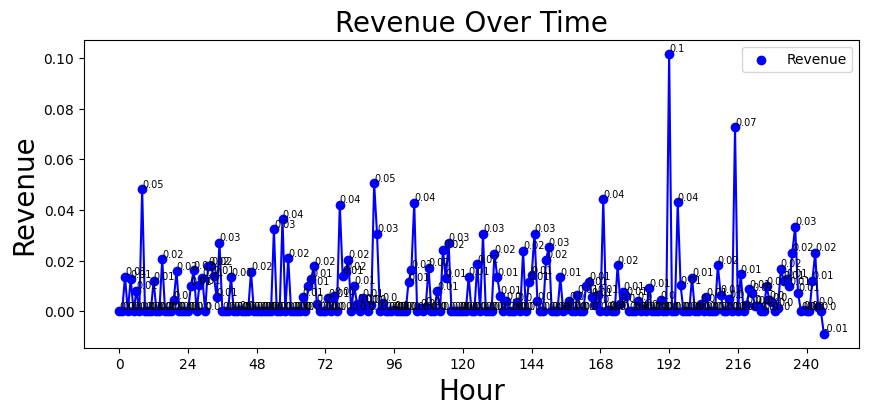

Cash Used:  1190


1.6879025430615613

In [ ]:
BuySellModelProfit(starting_cash)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3634c31-dd75-469c-bb95-8fb37ebd73a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>